In [2]:
import numpy as np
import pandas as pd
import random, copy
import os

In [3]:
from sklearn.utils import shuffle
import keras
import tensorflow as tf
from sklearn import preprocessing

In [ ]:
# final_df = []
# Label_col=[]
# idx = 1
# for dirname, _, filenames in os.walk('/kaggle/input/induction-motor-multi-csv-files/BTP/raw_csv/'):
#     for filename in filenames:
#         name = filename.split('.')
#         speed = name[0][:2]
# #         print(speed)
#         if len(name[2:]) > 5:
# #             print(name[0])
#             continue
#         csv_file = pd.read_csv('/kaggle/input/induction-motor-multi-csv-files/BTP/raw_csv/' + filename)
# #         csv_file.info()
#         print("--------  " + filename + " --------")
#         lbl = csv_file.iloc[2]['label']
#         row = 0
#         index = csv_file.index
#         last_row = len(index)-1
#         while row + 1000 < last_row:
#             df = []
#             for i in range(10):
#                 dataframe = []
#                 dataframe.append(csv_file[row:row+100])
#     #                 dataframe['speed'] = float(speed)
#     #                 print(type(dataframe))
#                 dataframe=np.reshape(dataframe,(100,10))
#                 df_temp = pd.DataFrame(dataframe)
#                 df_temp.columns = ['X_Value', 'Acceleration', 'Acceleration_0', 'Acceleration_1', 'Voltage',
#                              'Voltage_0', 'Voltage_1', 'Voltage_2', 'Voltage_3','Label']
#                 df_temp['Speed'] = float(speed)
# #                 df_temp.drop('Voltage_3', inplace=True, axis=1)
#     #             print(df_temp)
#                 df_temp.drop('Label', inplace=True, axis=1)
#                 df.append(df_temp)
#                 row = row + 100
#             Label_col.append(lbl)
#             df[len(df)-1]['Label']=float(lbl)
#             temp = pd.concat(df,axis=1)
#             temp = temp.values.tolist()
#             np.save(str(idx)+'.npy', temp)
#             idx=idx+1

In [ ]:
# os.chdir('/kaggle/working/')
# import shutil
# shutil.make_archive('numpy_files', 'zip', '/kaggle/working/dataset')

In [4]:
data = np.load('/kaggle/input/induction-motor-multi-csv-files/numpy_files_new/5955.npy')
data.shape
rows = data.shape[0]
cols= data.shape[1]
rows,cols

(100, 91)

In [5]:
list = os.listdir('/kaggle/input/induction-motor-multi-csv-files/numpy_files_new/')
number_files = len(list)
number_files_train = number_files/5
number_files

44925

In [6]:
files = random.sample(range(1,number_files),25000)
print(len(np.unique(files)))

25000


In [7]:
Label_Col = []
Data_Col = []
for i in files:
    data = np.load('/kaggle/input/induction-motor-multi-csv-files/numpy_files_new/'+ str(i) +'.npy')
    rows=len(data)
    cols=len(data[0])
    lbl = data[0][cols-1]
    Label_Col.append(lbl)
#     print(np.shape(data))
    Data_Col.append(np.delete(data, cols-1, 1))
#     print(np.shape(Data_Col[0]))

In [8]:
print(np.unique(Label_Col))
print(len(Label_Col),len(Data_Col))

# maintaining label order for one hot encoding since labels '7' & '8' are missing in this iteration
# for i in range(len(Label_Col)):
#     if Label_Col[i]>6:
#         Label_Col[i]=Label_Col[i]-2

# print(np.unique(Label_Col))
# print(len(Label_Col),len(Data_Col))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
25000 25000


In [9]:
print(np.shape(Data_Col),np.shape(Label_Col))

(25000, 100, 90) (25000,)


In [10]:
pd.DataFrame(Data_Col[0])

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,16.45000,-0.075471,-0.631734,-4.555665,-0.113876,-0.392997,0.508415,-0.000310,25.0,16.45500,...,25.0,16.49500,-1.761439,-2.227020,-0.371665,-0.278732,-0.137130,0.413100,-0.000283,25.0
1,16.45005,1.876760,1.983980,-0.952821,-0.116113,-0.396390,0.508790,-0.000296,25.0,16.45505,...,25.0,16.49505,-2.204229,-3.048789,-1.681011,-0.280351,-0.133052,0.414046,-0.000310,25.0
2,16.45010,0.107323,0.374205,-2.351858,-0.116602,-0.390202,0.507667,-0.000310,25.0,16.45510,...,25.0,16.49510,-1.513984,-2.191168,-0.803703,-0.280004,-0.131461,0.408523,-0.000255,25.0
3,16.45015,2.301602,1.632091,-0.063750,-0.119006,-0.392112,0.507500,-0.000227,25.0,16.45515,...,25.0,16.49515,-2.481188,-2.722930,-1.631142,-0.281108,-0.127081,0.409030,-0.000325,25.0
4,16.45020,1.583452,0.077937,-2.717607,-0.119223,-0.386735,0.506716,-0.000280,25.0,16.45520,...,25.0,16.49520,-1.628308,-1.592122,0.243920,-0.281311,-0.126127,0.404361,-0.000301,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.45475,-2.056223,2.303454,0.075688,-0.263247,-0.154863,0.418832,-0.000337,25.0,16.45975,...,25.0,16.49975,-1.767832,-2.283990,2.433392,-0.253887,0.143559,0.110069,-0.000197,25.0
96,16.45480,-1.222028,3.147323,0.881684,-0.266887,-0.153683,0.417791,-0.000259,25.0,16.45980,...,25.0,16.49980,-1.533652,-3.187653,2.428245,-0.255065,0.149817,0.103626,-0.000198,25.0
97,16.45485,-1.694566,2.660500,-0.216177,-0.265140,-0.150658,0.416594,-0.000306,25.0,16.45985,...,25.0,16.49985,-1.308201,-2.880948,2.348846,-0.252352,0.149879,0.102788,-0.000213,25.0
98,16.45490,-0.911141,3.333336,0.455896,-0.268676,-0.149244,0.415112,-0.000285,25.0,16.45990,...,25.0,16.49990,-2.857103,-3.356109,1.468353,-0.251828,0.154862,0.095138,-0.000197,25.0


# **Model in Keras**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers, models
import sklearn.metrics as metrics

**Test Data Prep**

In [12]:
from sklearn.model_selection import train_test_split

X = copy.deepcopy(Data_Col)
y = copy.deepcopy(Label_Col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

22500 22500 2500 2500


In [14]:
print(np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test))

(22500, 100, 90) (22500,) (2500, 100, 90) (2500,)


In [15]:
X_train = np.expand_dims(np.array(X_train), axis=-1)
X_test = np.expand_dims(np.array(X_test), axis=-1)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, X_test.shape)

(22500, 100, 90, 1) (2500, 100, 90, 1)


In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [17]:
train_dataset

<TensorSliceDataset shapes: ((100, 90, 1), ()), types: (tf.float64, tf.float64)>

In [18]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 90, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 35200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
history = model.fit(train_dataset, epochs=100, validation_data=(test_dataset))

Epoch 1/100
352/352 [==============================] - 6s 15ms/step - loss: 0.4558 - accuracy: 0.8231 - val_loss: 0.2865 - val_accuracy: 0.8888
Epoch 2/100
352/352 [==============================] - 5s 14ms/step - loss: 0.2123 - accuracy: 0.9231 - val_loss: 0.1877 - val_accuracy: 0.9348
Epoch 3/100
352/352 [==============================] - 5s 14ms/step - loss: 0.1106 - accuracy: 0.9592 - val_loss: 0.1796 - val_accuracy: 0.9348
Epoch 4/100
352/352 [==============================] - 5s 14ms/step - loss: 0.0859 - accuracy: 0.9688 - val_loss: 0.1482 - val_accuracy: 0.9496
Epoch 5/100
352/352 [==============================] - 5s 14ms/step - loss: 0.0791 - accuracy: 0.9697 - val_loss: 0.1621 - val_accuracy: 0.9416
Epoch 6/100
352/352 [==============================] - 5s 14ms/step - loss: 0.0617 - accuracy: 0.9760 - val_loss: 0.1549 - val_accuracy: 0.9480
Epoch 7/100
352/352 [==============================] - 5s 14ms/step - loss: 0.0659 - accuracy: 0.9741 - val_loss: 0.1496 - val_accuracy:

In [39]:
model.evaluate(test_dataset)

40/40 [==============================] - 0s 6ms/step - loss: 0.3481 - accuracy: 0.9632


[0.3481024503707886, 0.9631999731063843]

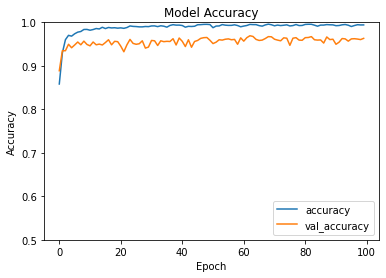

In [40]:
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


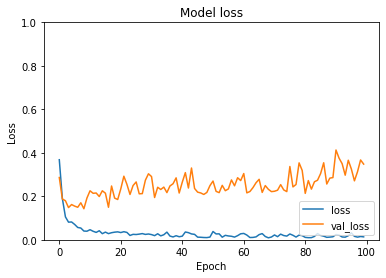

In [41]:
plt.title('Model loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

**Cofusion Matrix Added**

defects = {'nd':0.0, 'bf':1.0, 'ur':2.0, 'brf':3.0, 'rm':4.0, 'brbf':5.0, 'vusff':6.0, 'puspf':7.0, 'mpuspf':8.0, 'mswf':9.0, 'swf':10.0}

In [42]:
Class_names = [
'ND',
'BF',
'UR',
'BRF',
'RM',
'BRBF',
'VUSFF',
'PUSPF',
'MPUSPF',
'MSWF',
'SWF']

#removing missing file names
# Class_names.remove('PUSPF')
# Class_names.remove('MPUSPF')

In [43]:
predictions = model.predict(test_dataset, batch_size=10, verbose=0)

In [44]:
predictions

array([[ -40.305172 ,  -80.38004  ,  -70.26862  , ...,  -37.23967  ,
          34.27186  ,   -8.12867  ],
       [ -35.718506 ,  -30.677376 ,  -10.467679 , ...,  -28.403036 ,
          43.652477 ,   20.639961 ],
       [ -52.06878  ,  -54.128693 ,  -30.583717 , ...,   -3.6772664,
          45.118797 ,   72.88183  ],
       ...,
       [  23.741974 ,    8.180996 ,   91.05988  , ...,   -3.2549036,
         -15.04099  ,  -55.309395 ],
       [-198.14368  ,  419.5124   ,  146.73221  , ..., -157.31032  ,
          55.784615 ,    4.747254 ],
       [  -3.3562489, -207.53865  ,  -57.260456 , ...,   -4.983385 ,
         -77.79459  , -136.82623  ]], dtype=float32)

In [45]:
predicted_classes = model.predict_classes(test_dataset, batch_size=10, verbose=0)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
np.unique(predicted_classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [47]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predicted_classes)

In [48]:
confusion_matrix

array([[213,   0,   0,   0,   0,   4,   1,   0,   0,   0,   0],
       [  0, 238,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 232,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0,   0,   0, 258,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1, 210,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 204,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 224,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 245,   9,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 176,   0,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0,   1, 203,  26],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 205]])

In [49]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



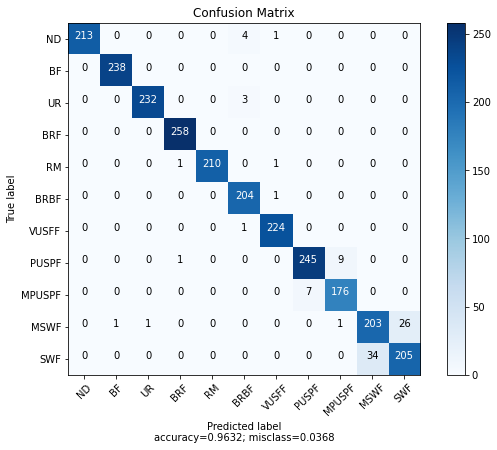

In [50]:
plot_confusion_matrix(confusion_matrix, 
                      normalize    = False,
                      target_names = Class_names,
                      title        = "Confusion Matrix")



In [51]:
report = metrics.classification_report(y_test, predicted_classes)
print(report)  

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       218
         1.0       1.00      1.00      1.00       238
         2.0       1.00      0.99      0.99       235
         3.0       0.99      1.00      1.00       258
         4.0       1.00      0.99      1.00       212
         5.0       0.96      1.00      0.98       205
         6.0       0.99      1.00      0.99       225
         7.0       0.97      0.96      0.97       255
         8.0       0.95      0.96      0.95       183
         9.0       0.86      0.88      0.87       232
        10.0       0.89      0.86      0.87       239

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



In [52]:
# save model and architecture to single file
model.save("Model_CNN_2_11_Classes.h5")
print("Saved model to disk")

Saved model to disk
